In [4]:
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import tensorflow as tf
from sklearn.metrics import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from data.preprocess import *
from evaluation.benchmark import *
from data.preprocess import split_by_patient
data = preprocess(path='../data/raw/CD_PD.mat')

# Random Baseline (label=Diagnosis)

This baseline will uniformly random the label (0 = No, 1 = Yes), and used to compare with other models. Other models should exceed this baseline.

In [72]:
import tqdm
accs,recs,precs,f1s = [],[],[],[]
for i in tqdm.tqdm(range(1000)):
    data_train, data_test = split_by_patient(data)
    y_true = data_test['diagnosis'].astype(np.float32)
    y_pred = np.array([np.random.choice(2) for i in range(len(y_true))])
    acc, rec, prec, f1 = evaluate(y_true, y_pred, verbose=False)
    accs.append(acc)
    recs.append(rec)
    precs.append(prec)
    f1s.append(f1)

100%|██████████| 1000/1000 [00:03<00:00, 331.71it/s]


min=0.275, max=0.75, avg=0.501875, std=0.0755702280994308


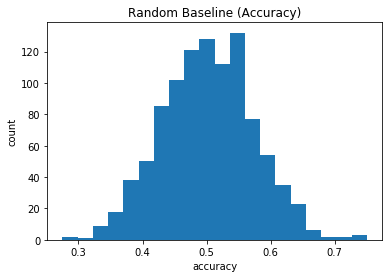

In [80]:
plt.title('Random Baseline (Accuracy)')
plt.xlabel('accuracy')
plt.ylabel('count')
plt.hist(accs, bins=20)
print('min={}, max={}, avg={}, std={}'.format(np.min(accs),np.max(accs),np.mean(accs),np.std(accs)))

min=0.125, max=0.9230769230769231, avg=0.49794248901571053, std=0.12482141506902701


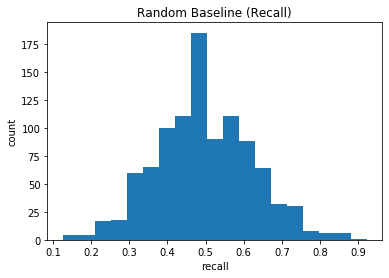

In [81]:
plt.title('Random Baseline (Recall)')
plt.xlabel('recall')
plt.ylabel('count')
plt.hist(recs, bins=19)
print('min={}, max={}, avg={}, std={}'.format(np.min(recs),np.max(recs),np.mean(recs),np.std(recs)))

min=0.05263157894736842, max=0.7777777777777778, avg=0.41087555080610616, std=0.10417732556782229


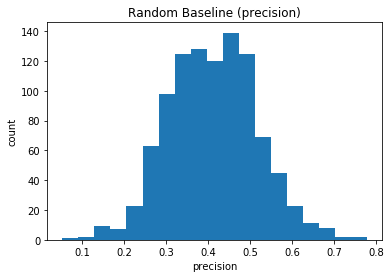

In [82]:
plt.title('Random Baseline (precision)')
plt.xlabel('precision')
plt.ylabel('count')
plt.hist(precs, bins=19)
print('min={}, max={}, avg={}, std={}'.format(np.min(precs),np.max(precs),np.mean(precs),np.std(precs)))

min=0.08, max=0.744186046511628, avg=0.4439418289106013, std=0.09948415906519312


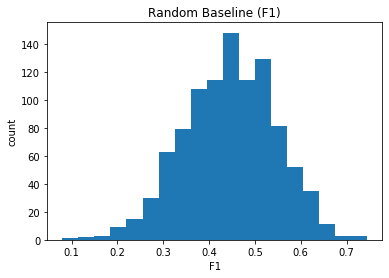

In [84]:
plt.title('Random Baseline (F1)')
plt.xlabel('F1')
plt.ylabel('count')
plt.hist(f1s, bins=19)
print('min={}, max={}, avg={}, std={}'.format(np.min(f1s),np.max(f1s),np.mean(f1s),np.std(f1s)))

# Random Baseline (label=clock_drawing)

In [85]:
import tqdm
accs,recs,precs,f1s = [],[],[],[]
for i in tqdm.tqdm(range(1000)):
    data_train, data_test = split_by_patient(data)
    y_true = data_test['clock_drawing'].astype(np.float32)
    y_pred = np.array([np.random.choice(2) for i in range(len(y_true))])
    acc, rec, prec, f1 = evaluate(y_true, y_pred, verbose=False)
    accs.append(acc)
    recs.append(rec)
    precs.append(prec)
    f1s.append(f1)

100%|██████████| 1000/1000 [00:03<00:00, 315.81it/s]


min=0.275, max=0.775, avg=0.499975, std=0.07884715831911762


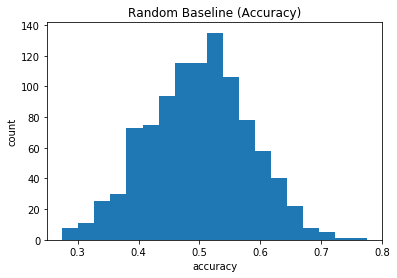

In [87]:
plt.title('Random Baseline (Accuracy)')
plt.xlabel('accuracy')
plt.ylabel('count')
_ = plt.hist(accs, bins=19)
print('min={}, max={}, avg={}, std={}'.format(np.min(accs),np.max(accs),np.mean(accs),np.std(accs)))

min=0.06666666666666667, max=0.8571428571428571, avg=0.5001864333927017, std=0.12030930219482172


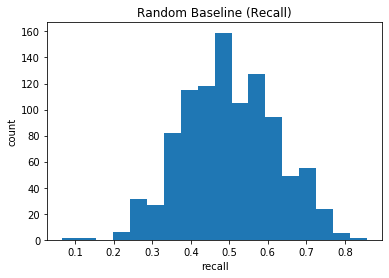

In [88]:
plt.title('Random Baseline (Recall)')
plt.xlabel('recall')
plt.ylabel('count')
plt.hist(recs, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(recs),np.max(recs),np.mean(recs),np.std(recs)))

min=0.0625, max=0.7647058823529411, avg=0.4433324262199373, std=0.10720041661966197


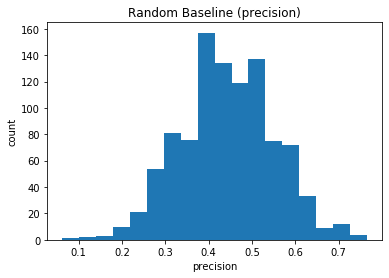

In [89]:
plt.title('Random Baseline (precision)')
plt.xlabel('precision')
plt.ylabel('count')
plt.hist(precs, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(precs),np.max(precs),np.mean(precs),np.std(precs)))

min=0.06451612903225808, max=0.7692307692307692, avg=0.4642989207230125, std=0.09967965223528064


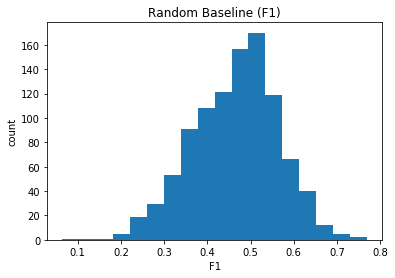

In [90]:
plt.title('Random Baseline (F1)')
plt.xlabel('F1')
plt.ylabel('count')
plt.hist(f1s, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(f1s),np.max(f1s),np.mean(f1s),np.std(f1s)))

# All One Baseline (label=diagnosis)

This baseline will predict y = 1 for any x.

In [94]:
acc3,rec3,prec3,f13 = [],[],[],[]
for i in tqdm.tqdm(range(1000)): 
    data_train, data_test = split_by_patient(data)
    y_true = data_test['diagnosis'].astype(np.float32)
    y_pred = np.ones(shape=(y_true.shape))
    acc, rec, prec, f1 = evaluate(y_true, y_pred, verbose=False)
    acc3.append(acc)
    rec3.append(rec)
    prec3.append(prec)
    f13.append(f1)

100%|██████████| 1000/1000 [00:02<00:00, 346.75it/s]


min=0.175, max=0.65, avg=0.40314999999999995, std=0.07011652800873701


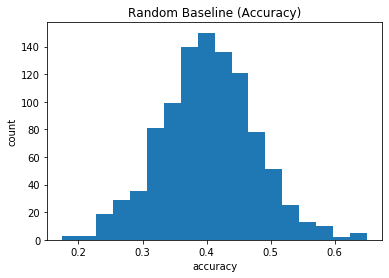

In [96]:
plt.title('Random Baseline (Accuracy)')
plt.xlabel('accuracy')
plt.ylabel('count')
_ = plt.hist(acc3, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(acc3),np.max(acc3),np.mean(acc3),np.std(acc3)))

min=1.0, max=1.0, avg=1.0, std=0.0


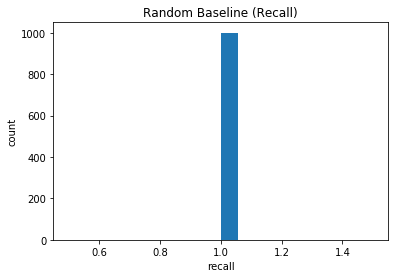

In [98]:
plt.title('Random Baseline (Recall)')
plt.xlabel('recall')
plt.ylabel('count')
plt.hist(rec3, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(rec3),np.max(rec3),np.mean(rec3),np.std(rec3)))

min=0.175, max=0.65, avg=0.40314999999999995, std=0.07011652800873701


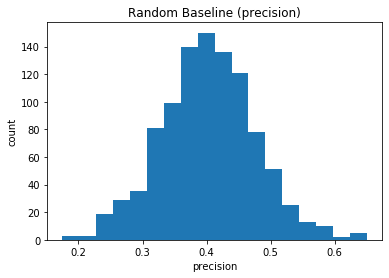

In [99]:
plt.title('Random Baseline (precision)')
plt.xlabel('precision')
plt.ylabel('count')
plt.hist(prec3, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(prec3),np.max(prec3),np.mean(prec3),np.std(prec3)))

min=0.2978723404255319, max=0.787878787878788, avg=0.5710648361864403, std=0.07166171414178758


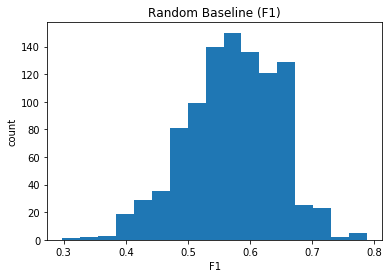

In [101]:
plt.title('Random Baseline (F1)')
plt.xlabel('F1')
plt.ylabel('count')
plt.hist(f13, bins=17)
print('min={}, max={}, avg={}, std={}'.format(np.min(f13),np.max(f13),np.mean(f13),np.std(f13)))

In [102]:
acc4,rec4,prec4,f14 = [],[],[],[]
for i in tqdm.tqdm(range(1000)): 
    data_train, data_test = split_by_patient(data)
    y_true = data_test['clock_drawing'].astype(np.float32)
    y_pred = np.ones(shape=(y_true.shape))
    acc, rec, prec, f1 = evaluate(y_true, y_pred, verbose=False)
    acc4.append(acc)
    rec4.append(rec)
    prec4.append(prec)
    f14.append(f1)

100%|██████████| 1000/1000 [00:02<00:00, 339.55it/s]


min=0.2, max=0.625, avg=0.44265000000000004, std=0.06866387332506084


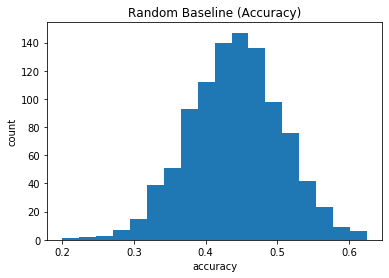

In [103]:
plt.title('Random Baseline (Accuracy)')
plt.xlabel('accuracy')
plt.ylabel('count')
_ = plt.hist(acc4, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(acc4),np.max(acc4),np.mean(acc4),np.std(acc4)))

min=1.0, max=1.0, avg=1.0, std=0.0


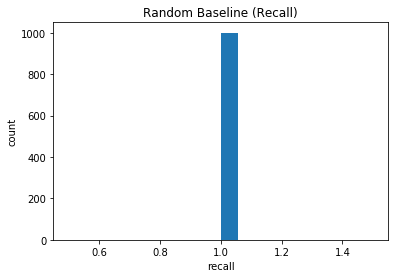

In [104]:
plt.title('Random Baseline (Recall)')
plt.xlabel('recall')
plt.ylabel('count')
plt.hist(rec4, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(rec4),np.max(rec4),np.mean(rec4),np.std(rec4)))

min=0.2, max=0.625, avg=0.44265000000000004, std=0.06866387332506084


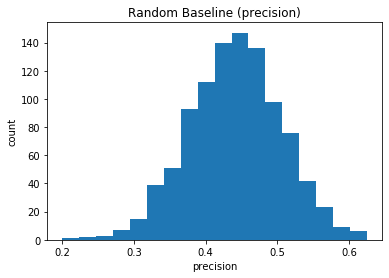

In [105]:
plt.title('Random Baseline (precision)')
plt.xlabel('precision')
plt.ylabel('count')
plt.hist(prec4, bins=18)
print('min={}, max={}, avg={}, std={}'.format(np.min(prec4),np.max(prec4),np.mean(prec4),np.std(prec4)))

min=0.33333333333333337, max=0.7692307692307693, avg=0.6104845654073973, std=0.06692489678547535


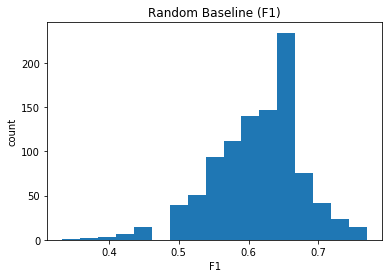

In [106]:
plt.title('Random Baseline (F1)')
plt.xlabel('F1')
plt.ylabel('count')
plt.hist(f14, bins=17)
print('min={}, max={}, avg={}, std={}'.format(np.min(f14),np.max(f14),np.mean(f14),np.std(f14)))

# All Zero Baseline

This baseline will predict y = 0 for any x.

In [107]:
acc5,rec5,prec5,f15 = [],[],[],[]
for i in tqdm.tqdm(range(1000)): 
    data_train, data_test = split_by_patient(data)
    y_true = data_test['diagnosis'].astype(np.float32)
    y_pred = np.zeros(shape=(y_true.shape))
    acc, rec, prec, f1 = evaluate(y_true, y_pred, verbose=False)
    acc5.append(acc)
    rec5.append(rec)
    prec5.append(prec)
    f15.append(f1)

100%|██████████| 1000/1000 [00:02<00:00, 344.85it/s]


min=0.4, max=0.8, avg=0.591, std=0.06731641701695062


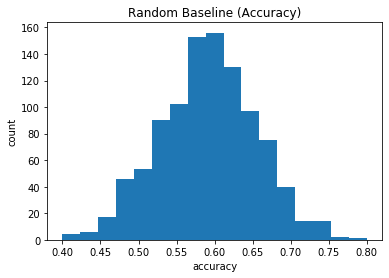

In [111]:
plt.title('Random Baseline (Accuracy)')
plt.xlabel('accuracy')
plt.ylabel('count')
_ = plt.hist(acc5, bins=17)
print('min={}, max={}, avg={}, std={}'.format(np.min(acc5),np.max(acc5),np.mean(acc5),np.std(acc5)))

In [112]:
acc5,rec5,prec5,f15 = [],[],[],[]
for i in tqdm.tqdm(range(1000)): 
    data_train, data_test = split_by_patient(data)
    y_true = data_test['clock_drawing'].astype(np.float32)
    y_pred = np.zeros(shape=(y_true.shape))
    acc, rec, prec, f1 = evaluate(y_true, y_pred, verbose=False)
    acc5.append(acc)
    rec5.append(rec)
    prec5.append(prec)
    f15.append(f1)

100%|██████████| 1000/1000 [00:02<00:00, 335.76it/s]


min=0.325, max=0.775, avg=0.5566749999999999, std=0.07065634702558574


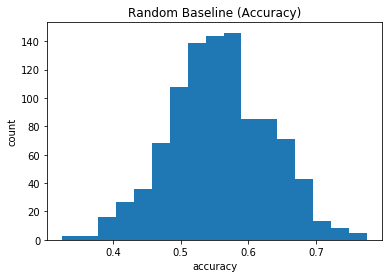

In [113]:
plt.title('Random Baseline (Accuracy)')
plt.xlabel('accuracy')
plt.ylabel('count')
_ = plt.hist(acc5, bins=17)
print('min={}, max={}, avg={}, std={}'.format(np.min(acc5),np.max(acc5),np.mean(acc5),np.std(acc5)))

# Performance Evaluation

We will run the model training & inference k times and evaluate the average performance 

In [ ]:
from evaluate.benchmark import run_benchmark
# def run_benchmark(get_split_data,
#               get_model,
#               data,
#               k=1, 
#               model_name='Model',
#               verbose=False
#              ):
    
#     '''
#     This function will run performance benchmark on the given model.
#     Input:
#         get_split_data : function to return sampled test train data
#         get_model : function to return a model to run benchmark on
#         k : iteration to run the tests (higher k ~ better avg. value)
#         model_name (default='Model') : Name for the model, used in plotting ROC Curves
#         verbose (default=False) : If true, then display benchmarking result/logs in each iteration
        
#     Output:
#         models : list of models which were generated & trained during the benchmarking
#     '''
    
#     acc, rec, prec, f1 = [], [], [], []
#     fp, tp, thresh = [], [], []
#     mean_tp, _tp = [], []
#     domain = np.linspace(0, 1, 100)
#     aucs = []
#     models = []
    
#     for i in range(k):
#         if verbose:
#             print('ITER:',i)
#         x_test, x_train, y_test, y_train = get_split_data(data) #data should randomly shuffle
    
#         #train & predict
#         model = get_model()
#         model.fit(x_train, y_train, epochs=100,verbose=0)
#         models.append(model) #store model
#         y_pred = model.predict(x_test)

#         #metric eval for thresh = 0.5
#         y2 = np.array(y_pred)
#         y2[y2 >= 0.5] = 1
#         y2[y2 < 0.5]  = 0
#         t = evaluate(y_test, y2,verbose=verbose)

#         #append the evaluation results to log
#         acc.append(t[0])
#         rec.append(t[1])
#         prec.append(t[2])
#         f1.append(t[3])

#         #ROC for other thresh
#         f, t, p = roc_curve(y_test, y_pred)
#         _tp.append(np.interp(domain, f, t))

#         #AUC
#         a = auc(f, t)

#         #logging
#         fp.append(f)
#         tp.append(t)
#         thresh.append(p)
#         aucs.append(a)
        
#     if verbose:
#         print('-----thresh=0.5--------')
#         print('mean acc:',np.mean(acc))
#         print('mean recall:',np.mean(rec))
#         print('mean precision:',np.mean(prec))
#         print('mean f1:',np.mean(f1))
#         print('-----------------------')
#         plt.title('Evaluation for 10 runs (thresh=0.5)')
#         plt.plot(np.arange(k), acc, label='acc')
#         plt.plot(np.arange(k), rec, label='recall')
#         plt.plot(np.arange(k), prec,label='precision')
#         plt.plot(np.arange(k), f1,  label='f1')
#         plt.xlabel('iteration')
#         plt.ylabel('score')
#         plt.legend()
#         plt.show()
        
#     #Calculate mean and std of roc curve
#     mean_tp = np.mean(_tp, axis=0)
#     std_tp = np.std(_tp, axis=0)
#     upper_tp = mean_tp + std_tp
#     lower_tp = mean_tp - std_tp
#     mean_auc = auc(domain, mean_tp)
    
#     #ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
#     plt.figure(figsize=(15,15))
#     plt.title('ROC Curve')
#     plt.xlabel('fpr')
#     plt.ylabel('tpr')
#     plt.plot([0,1],[0,1],label='Chance', linestyle='dashed',color='red')
    
#     #plot ROC Curve
#     for i in range(k):
#         plt.plot(fp[i], tp[i], label='%s iteration:%d AUC=%.2f' % (model_name,i,aucs[i]), alpha=0.2)
#     plt.plot(domain, mean_tp, color='blue', alpha=1, label='average AUC=%.2f' % mean_auc)
#     # plt.plot(domain, upper_tp, color='gray', alpha=0.1)
#     # plt.plot(domain, lower_tp, color='gray', alpha=0.1)
#     plt.fill_between(domain, upper_tp, lower_tp, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
#     plt.legend()
#     plt.show()
    
#     return models

